In [ ]:
pip install netCDF4

## Importing Libraries

In [3]:
# importing libraries needed for the Lab
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import netCDF4 as nc
import matplotlib.ticker as ticker

## Q1. Reading ASCII tabular data

In [ ]:
# reading the dataset using pandas
data = pd.read_csv('VIIRSNDE_global2020258.v1.0.txt', sep = ", ")
#using the describe to print various stats about the VIIRSNDE data
data.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Num           Lon  ...    YearDay          Time
count  56308.000000  56308.000000  ...    56308.0  56308.000000
mean      33.607516    -17.017503  ...  2020258.0   1218.496750
std       11.448650     75.332177  ...        0.0    477.782273
min        0.000000   -123.777184  ...  2020258.0      1.000000
25%       29.000000    -56.143966  ...  2020258.0    931.000000
50%       36.000000    -48.300728  ...  2020258.0   1312.000000
75%       36.000000     31.444255  ...  2020258.0   1525.000000
max       59.000000    178.967270  ...  2020258.0   2359.000000

[8 rows x 10 columns]

In [ ]:
#taking out mean seperately for a particular field, the same can be done for other fields and statistics
print(data['Num'].mean())
data['Lon'].median()

33.60751580592456


-48.300728

## Q2. Working with masks and masked arrays

In [ ]:
#Part(a) printing the data only when frp > 50
mask = data['frp(MW)']>50
data[mask]

Num         Lon        Lat  Mask  ...  line  sample  YearDay  Time
8        2   30.021530 -30.055561     9  ...   126     NDE  2020258     1
24       2   30.021530 -30.055561     9  ...   126     NDE  2020258     2
40       2   30.021530 -30.055561     9  ...   126     NDE  2020258     4
56       2   30.021530 -30.055561     9  ...   126     NDE  2020258     5
72       2   30.021530 -30.055561     9  ...   126     NDE  2020258     6
...    ...         ...        ...   ...  ...   ...     ...      ...   ...
56073   26   47.338715  30.353542     9  ...    52     NDE  2020258  2226
56107   35   29.245773  -1.513131     9  ...   599     NDE  2020258  2235
56108   35   29.214218  -1.521873     9  ...   600     NDE  2020258  2235
56109   35   29.243212  -1.526628     9  ...   600     NDE  2020258  2235
56290    3  178.662048 -16.883659     9  ...    21     NDE  2020258  2349

[13189 rows x 11 columns]

In [ ]:
#Part(b) Extract the data in 7°x7° box around Kanpur, India(26.4499° N, 80.3319° E)
#creating mask for Latitude and Longitude
mask2 = ((data['Lat']>19.4499) & (data['Lat']<33.4499)) & ((data['Lon']>73.3319) & data['Lon']<87.3319)
data[mask2]

Num        Lon        Lat  Mask  ...  line  sample  YearDay  Time
237     26  26.077833  30.539412     8  ...   135     NDE  2020258    26
238     26  26.086473  30.537628     8  ...   135     NDE  2020258    26
239     26   5.809155  31.684496     9  ...   344     NDE  2020258    26
240     26   6.059982  31.633959     8  ...   347     NDE  2020258    26
241     26   6.066102  31.633440     8  ...   355     NDE  2020258    26
...    ...        ...        ...   ...  ...   ...     ...      ...   ...
56090   26  49.581329  27.015823     9  ...   495     NDE  2020258  2226
56091   26  53.146355  25.531454     9  ...   620     NDE  2020258  2226
56092   26  53.151489  25.506628     9  ...   623     NDE  2020258  2226
56093   28  55.446602  23.150051     9  ...   135     NDE  2020258  2228
56094   28  56.553722  22.517843     8  ...   190     NDE  2020258  2228

[547 rows x 11 columns]

In [ ]:
#Part(c) Create a mask by preserving the size and shape of the original array
# Using the mask function of pandas to change the value for frp(MW)<50 to None this let us to change the data without affecting the shape and size of the data
data['frp(MW)'].mask(data['frp(MW)']<50,None)
data.head(10)

Num        Lon        Lat  Mask  Conf  ...  frp(MW) line  sample  YearDay  Time
0    2  29.991129 -29.555208     9   100  ...     None   53     NDE  2020258     1
1    2  29.981384 -29.601839     7    17  ...     None   60     NDE  2020258     1
2    2  30.085478 -29.868237     8    76  ...     None   97     NDE  2020258     1
3    2  30.084040 -29.874882     8    53  ...     None   98     NDE  2020258     1
4    2  30.082544 -29.881517     8    51  ...     None   99     NDE  2020258     1
5    2  30.022394 -29.892481     9    80  ...     None  102     NDE  2020258     1
6    2  30.480286 -29.992973     8    37  ...     None  106     NDE  2020258     1
7    2  29.612289 -29.989172     9    98  ...     None  126     NDE  2020258     1
8    2  30.021530 -30.055561     9   100  ...  54.1952  126     NDE  2020258     1
9    2  29.610741 -29.995834     8    70  ...     None  127     NDE  2020258     1

[10 rows x 11 columns]

##Q3  Plot the time-series of two tide gauge stations with Tide gauge data of Perth, Fremantle and Sydney, Fort Denison

In [ ]:
# reading the two tide guage data
data_Per = pd.read_csv('Perth.txt', sep = ";", names=['Year', 'Annual_Mean_Sea_Level', 'A', 'B'])
data_Syn = pd.read_csv('Sydney.txt', sep = ";", names=['Year', 'Annual_Mean_Sea_Level', 'A', 'B'])
data_Per['Annual_Mean_Sea_Level']= data_Per['Annual_Mean_Sea_Level'].mask(data_Per['Annual_Mean_Sea_Level']<0, None)

In [ ]:
#Using subplot to plot the graphs
plt.subplot(2, 1, 1) #the grids define the orientation of the plots
plt.plot(data_Syn['Year'], data_Syn['Annual_Mean_Sea_Level'], label='Sydney') #defing x and y axis data
plt.plot(data_Per['Year'], data_Per['Annual_Mean_Sea_Level'], label='Perth')
#labelling the x-axis and y-axis
plt.xlabel("Year")
plt.ylabel("Annual Mean Sea Level")
#showing the graphs
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(data_Syn['Year'], data_Syn['Annual_Mean_Sea_Level'], label='Sydney')
plt.scatter(data_Per['Year'], data_Per['Annual_Mean_Sea_Level'], label='Perth')
plt.xlabel("Year")
plt.ylabel("Annual Mean Sea Level")
plt.legend()

I think the time-series plot is more informative as it would be easier to analysze specially in cases where data points interesect while the scatter plot is harder to read for larger data points concentrated at a particular area

##Q4 Plot the time-series data in Seaborn with and without error bars

In [ ]:
#reading data
data_sagar = pd.read_csv('Gandhi-Sagar_13028_water_level_altimetry.txt', sep=" ", names= ['date', 'water level', 'error'], skiprows=15)
data_sagar

date  water level  error
0    2006-08-23      398.308  0.088
1    2006-09-27      400.101  0.009
2    2006-12-06      398.869  0.010
3    2007-02-14      395.534  0.057
4    2007-03-28      395.058  0.016
..          ...          ...    ...
475  2020-08-11      396.610  0.011
476  2020-08-14      396.523  0.008
477  2020-08-24      397.401  0.013
478  2020-09-23      399.592  0.002
479  2020-10-03      399.774  0.051

[480 rows x 3 columns]

In [ ]:
#using seaborn to plot time series
sns.lineplot(x=data_sagar['date'], y=data_sagar['water level'], data=data_sagar).xaxis.set_major_locator(ticker.LinearLocator(6))#limiting the x-axis label
plt.title('water level vs date')
plt.show()

In [ ]:
# sns.relplot(
#     data=data_sagar, kind="line",
#     x=data_sagar['date'], y=data_sagar['water level'],col="frontal", hue='cue')

##Q5 Read the netcdf file

###Part1

In [ ]:
#reading .nc data using netCDF4
fname = 'JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc'
aod_file_id = nc.Dataset(fname)

In [ ]:
#variables in the aod file
aod_file_id.variables.keys()

odict_keys(['Latitude', 'Longitude', 'AOD550'])

In [ ]:
num_array = np.array([4,5,6,1])
num_array[2]

6

In [ ]:
aod_file_id.variables['Latitude'][:]

masked_array(
  data=[[35.603916, 35.60376 , 35.603596, ..., 30.794918, 30.7902  ,
         30.785479],
        [35.61846 , 35.618294, 35.61812 , ..., 30.808607, 30.803898,
         30.799177],
        [35.633007, 35.632824, 35.63264 , ..., 30.822298, 30.817606,
         30.812897],
        ...,
        [40.63037 , 40.63035 , 40.63033 , ..., 35.516685, 35.51157 ,
         35.50644 ],
        [40.64492 , 40.644886, 40.644844, ..., 35.530148, 35.525047,
         35.519928],
        [40.65947 , 40.65943 , 40.659378, ..., 35.543583, 35.538498,
         35.5334  ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [ ]:
aod_file_id.variables['Longitude'][:]

masked_array(
  data=[[ -99.25617 ,  -99.274155,  -99.2924  , ..., -131.29337 ,
         -131.30904 , -131.32474 ],
        [ -99.25635 ,  -99.27446 ,  -99.29288 , ..., -131.29865 ,
         -131.31433 , -131.33005 ],
        [ -99.25662 ,  -99.27448 ,  -99.29261 , ..., -131.30397 ,
         -131.31964 , -131.33534 ],
        ...,
        [ -99.63374 ,  -99.65315 ,  -99.67265 , ..., -133.71568 ,
         -133.73207 , -133.74847 ],
        [ -99.63331 ,  -99.65271 ,  -99.67212 , ..., -133.72209 ,
         -133.73846 , -133.7549  ],
        [ -99.63281 ,  -99.65213 ,  -99.67157 , ..., -133.72852 ,
         -133.7449  , -133.76132 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [ ]:
AOD_550 = aod_file_id.variables['AOD550'][:,:]
AOD_550

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-999.9,
  dtype=float32)

In [ ]:
type(AOD_550)

numpy.ma.core.MaskedArray

###Part2

In [7]:
#reading the .nc data using netCDF4
CO= nc.Dataset("MOP03JM-201811-L3V95.6.3_thinned.nc",'r')
CO

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): YDim(180), XDim(360)
    variables(dimensions): float32 Latitude(YDim), float32 Longitude(XDim), float32 RetrievedCOTotalColumnDay(XDim, YDim)
    groups: 

In [8]:
#converting the dataset into arrays
lons = CO.variables['Latitude'][:]
lats = CO.variables['Longitude'][:]
Co = CO.variables['RetrievedCOTotalColumnDay'][:]
Co_max = CO.variables['RetrievedCOTotalColumnDay'].units

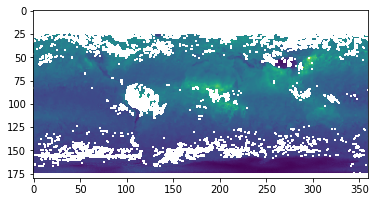

In [126]:
#plotting the data
data= CO['RetrievedCOTotalColumnDay'][:]
data= np.rot90(data)
plt.imshow(data)
plt.xlabel('')
plt.show()

In [ ]:
#downloading libraries to use basemap for google colab
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
#downloading pyproj
!pip install pyproj==1.9.6

In [1]:
#importing Basemap
from mpl_toolkits.basemap import Basemap

In [128]:
lon_0 = lons.mean() # parameters for the Stereographic Projection
lat_0 = lats.mean()
m = Basemap(width=5000000,height=3500000,resolution='l',projection='stere',lat_ts=40,lat_0=lat_0,lon_0=lon_0)

In [129]:
lon, lat = np.meshgrid(lons, lats) #meshgrid to create 2D arrays
xi, yi = m(lon, lat)

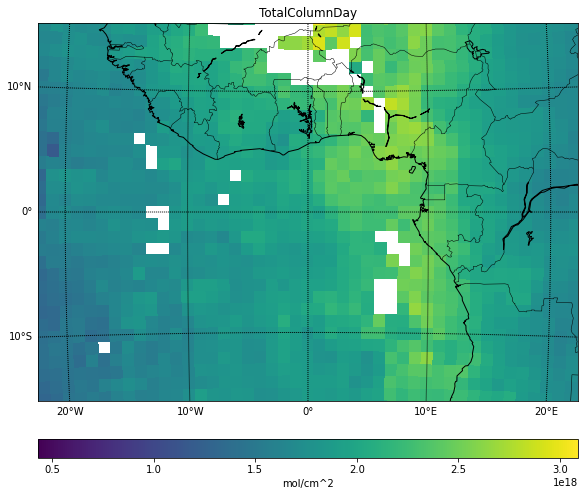

In [130]:
plt.figure(figsize=(20,8))
cs = m.pcolor(xi,yi,np.squeeze(Co))
#latitude and longitude
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)
#drawing coastlines
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#making a colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(Co_max)
#title of the map
plt.title('TotalColumnDay')
plt.show()

## Q6

In [131]:
#reading data
sea = Dataset('sst.ltm.1981-2010.nc')
sea.variables.keys()

odict_keys(['time', 'lat', 'lon', 'sst'])

In [170]:
#converting the dataset into arrays
lons_1 = sea.variables['lon'][:]
lats_1 = sea.variables['lat'][:]
sst = sea.variables['sst'][0,:,:]
sst_max = sea.variables['sst'].units

In [171]:
#printing shapes of all variables
print(lats_1.shape)
print(lons_1.shape)
sst.shape

(180,)
(360,)


(180, 360)

In [172]:
#longitude and latitude for projections
lon_01 = lons_1.mean()
lat_01 = lats_1.mean()
m = Basemap(width=50000000,height=35000000,resolution='l',projection='stere',lat_ts=40,lat_0=lat_01,lon_0=lon_01)

In [173]:
#making a meshgrid
lon_1, lat_1 = np.meshgrid(lons_1, lats_1)
xi_1, yi_1= m(lon_1, lat_1)

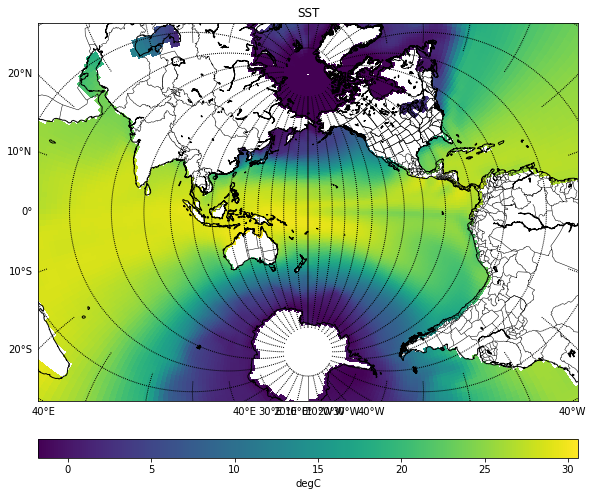

In [174]:
plt.figure(figsize=(20,8))
cs = m.pcolor(xi_1,yi_1,np.squeeze(sst))
#latitude and longitude
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)
#drawing coastlines
m.drawcoastlines()
m.drawstates()
m.drawcountries()
#making a colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(sst_max)
#title of the map
plt.title('SST')
plt.show()

##Q7

##Q8